In [1]:
import pandas as pd

Data Pre-processing:


In [2]:
dt=pd.read_csv("/content/AppleProductssales.csv")

In [3]:
dt.dtypes

ID                 object
Store_id            int64
Store_Type         object
Apple_products     object
Region_Code        object
Date               object
Holiday             int64
Discount           object
#Order              int64
Sales             float64
dtype: object

In [4]:
dt.info() #to get the structure of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              188340 non-null  object 
 1   Store_id        188340 non-null  int64  
 2   Store_Type      188340 non-null  object 
 3   Apple_products  188340 non-null  object 
 4   Region_Code     188340 non-null  object 
 5   Date            188340 non-null  object 
 6   Holiday         188340 non-null  int64  
 7   Discount        188340 non-null  object 
 8   #Order          188340 non-null  int64  
 9   Sales           188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [5]:
dt.isnull().sum() # to check the null values

ID                0
Store_id          0
Store_Type        0
Apple_products    0
Region_Code       0
Date              0
Holiday           0
Discount          0
#Order            0
Sales             0
dtype: int64

In [6]:
dt['Store_id']=dt['Store_id'].astype("category")
dt['Store_Type']=dt['Store_Type'].astype("category")
dt['Apple_products']=dt['Apple_products'].astype("category")
dt['Region_Code']=dt['Region_Code'].astype("category")
dt['Discount']=dt['Discount'].astype("category")
# converting all necessary datatype into categorical.

In [7]:
dt['year'] = pd.to_datetime(dt['Date'], format='%d-%m-%Y').dt.year #Extrancting year only as it was in yera format only.

In [15]:
dt.dtypes

ID                  object
Store_id          category
Store_Type        category
Apple_products    category
Region_Code       category
Date                object
Holiday              int64
Discount          category
#Order               int64
Sales              float64
year                 int32
dtype: object

In [8]:
dt=dt.drop(["ID","Date"],axis=1)

In [9]:
dt['year']=dt['year'].astype("category")

As we have 3 different category of apple product we are making 3 new dataframe according to the product.

In [10]:
airpods_data = dt[dt['Apple_products'] == 'Airpods']

In [22]:
airpods_data.head()

,Store_id,Store_Type,Apple_products,Region_Code,Holiday,Discount,#Order,Sales,year
1,253,S4,Airpods,R1,1,Yes,60,51789.12,2018
2,252,S3,Airpods,R1,1,Yes,42,36868.20,2018
6,248,S1,Airpods,R2,1,Yes,40,35352.66,2018
7,247,S1,Airpods,R3,1,Yes,64,52650.00,2018
8,246,S3,Airpods,R3,1,Yes,62,42633.78,2018


In [11]:
import matplotlib.pyplot as plt
import seaborn as sb

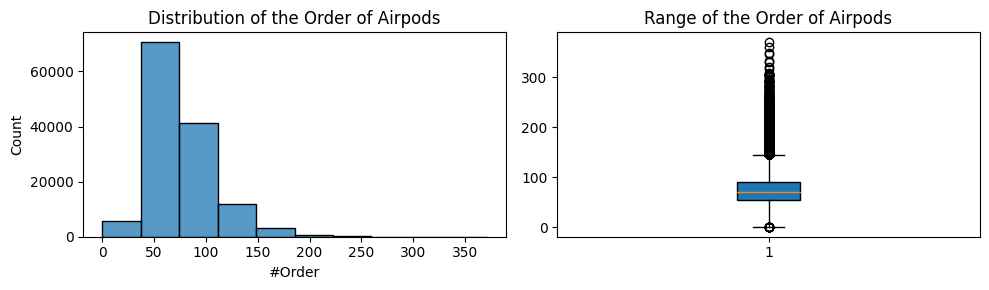

In [12]:
#import warnings

#warnings.filterwarnings("ignore")

#We are making the histogram and box plot to check the distribution of #Order.

fig, axes = plt.subplots(1,2, figsize=(10,3)) #plt.subplots()::creates a figure and one row with two columns of subplots (1 row and 2 columns).

sb.histplot(airpods_data['#Order'],bins=10,ax=axes[0]) #bin::number of bins (intervals) in the histogram.

plt.boxplot(airpods_data['#Order'],patch_artist = True) #patch_artist::used to fill the boxes with colors in the box plot.

axes[0].set_title('Distribution of the Order of Airpods')

axes[1].set_title('Range of the Order of Airpods')

plt.tight_layout()

plt.show()

In [24]:
airpods_data.shape

(133644, 9)

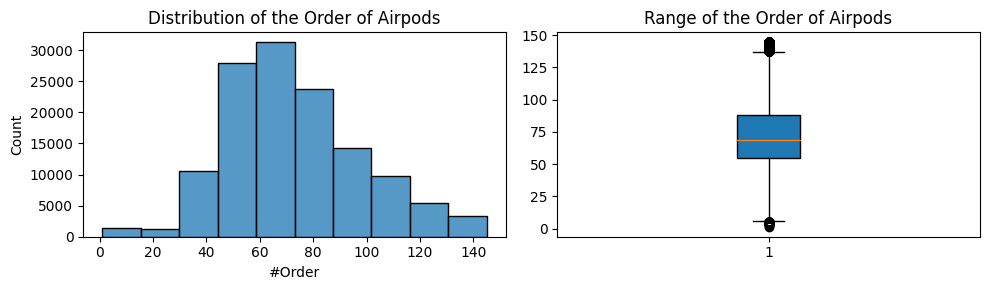

In [13]:
Q1=airpods_data['#Order'].quantile(0.25)
Q3=airpods_data['#Order'].quantile(0.75)
IQR= Q3 - Q1
Upperbound_order = Q3 + 1.5*IQR
lowerbound_order = Q1 - 1.5*IQR
Index2=airpods_data.loc[airpods_data['#Order']>Upperbound_order,"#Order"].index
Index1=airpods_data.loc[airpods_data['#Order']<lowerbound_order,"#Order"].index
airpods_data=airpods_data.drop(Index2)
airpods_data=airpods_data.drop(Index1)
fig, axes = plt.subplots(1,2, figsize=(10,3))

sb.histplot(airpods_data['#Order'],bins=10,ax=axes[0])

plt.boxplot(airpods_data['#Order'],patch_artist = True)

axes[0].set_title('Distribution of the Order of Airpods')

axes[1].set_title('Range of the Order of Airpods')

plt.tight_layout()

plt.show()

In [27]:
airpods_data.shape

(129118, 9)

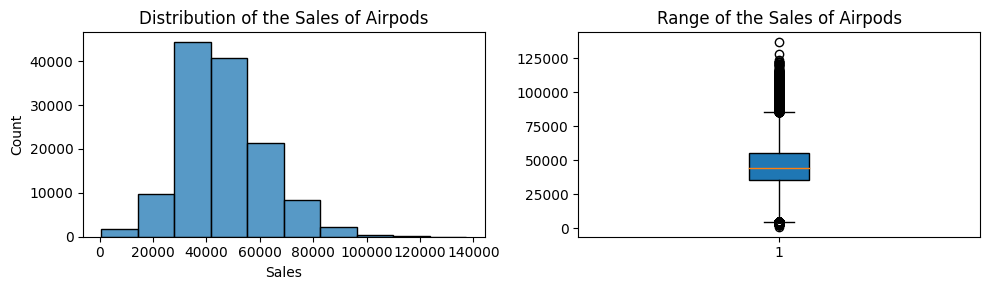

In [14]:
#import warnings

#warnings.filterwarnings("ignore")

#We are making the histogram and box plot to check the distribution of Sales.(which is our target variable.)

fig, axes = plt.subplots(1,2, figsize=(10,3)) #plt.subplots()::creates a figure and one row with two columns of subplots (1 row and 2 columns).

sb.histplot(airpods_data['Sales'],bins=10,ax=axes[0]) #bin::number of bins (intervals) in the histogram.

plt.boxplot(airpods_data['Sales'],patch_artist = True) #patch_artist::used to fill the boxes with colors in the box plot.

axes[0].set_title('Distribution of the Sales of Airpods')

axes[1].set_title('Range of the Sales of Airpods')

plt.tight_layout()

plt.show()

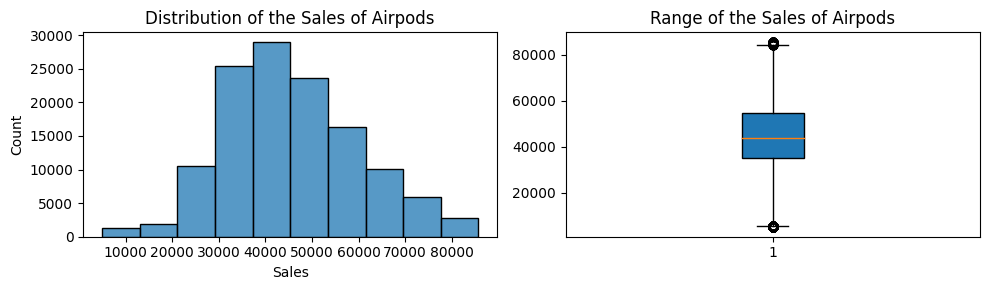

In [15]:
Q1=airpods_data['Sales'].quantile(0.25)
Q3=airpods_data['Sales'].quantile(0.75)
IQR= Q3 - Q1
Upperbound_order = Q3 + 1.5*IQR
lowerbound_order = Q1 - 1.5*IQR
Index2=airpods_data.loc[airpods_data['Sales']>Upperbound_order,"Sales"].index
Index1=airpods_data.loc[airpods_data['Sales']<lowerbound_order,"Sales"].index
airpods_data=airpods_data.drop(Index2)
airpods_data=airpods_data.drop(Index1)
fig, axes = plt.subplots(1,2, figsize=(10,3))

sb.histplot(airpods_data['Sales'],bins=10,ax=axes[0])

plt.boxplot(airpods_data['Sales'],patch_artist = True)

axes[0].set_title('Distribution of the Sales of Airpods')

axes[1].set_title('Range of the Sales of Airpods')

plt.tight_layout()

plt.show()

In [16]:
airpods_data.shape

(126879, 9)

We are ploting bar plot for all categorical data in the dataset airpods data.

In [17]:
airpods_data['Store_Type'].unique()

['S4', 'S3', 'S1', 'S2']
Categories (4, object): ['S1', 'S2', 'S3', 'S4']

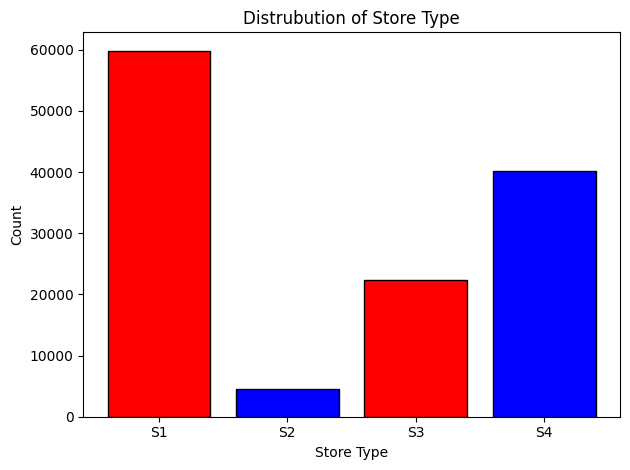

In [18]:
st1 = airpods_data.loc[airpods_data['Store_Type'] == 'S1', ].shape[0] # .loc method is used to filter the DataFrame based on the condition
st2 = airpods_data.loc[airpods_data['Store_Type'] == 'S2', ].shape[0] #shape[0] is used to get the number of rows that meet the condition.
st3 = airpods_data.loc[airpods_data['Store_Type'] == 'S3', ].shape[0]
st4 = airpods_data.loc[airpods_data['Store_Type'] == 'S4', ].shape[0]


slice = [st1,st2,st3,st4]
labels = ["S1", "S2","S3","S4"]

plt.bar(labels, slice, color=['red', 'blue'], edgecolor='black')

plt.xlabel('Store Type')
plt.ylabel('Count')
plt.title('Distrubution of Store Type')

plt.tight_layout()

In [19]:
airpods_data['Region_Code'].unique()

['R1', 'R2', 'R3', 'R4']
Categories (4, object): ['R1', 'R2', 'R3', 'R4']

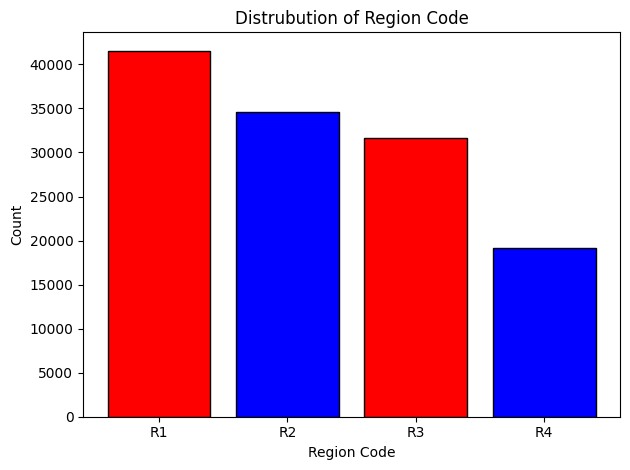

In [20]:
r1 = airpods_data.loc[airpods_data['Region_Code'] == 'R1', ].shape[0] # .loc method is used to filter the DataFrame based on the condition
r2 = airpods_data.loc[airpods_data['Region_Code'] == 'R2', ].shape[0] #shape[0] is used to get the number of rows that meet the condition.
r3 = airpods_data.loc[airpods_data['Region_Code'] == 'R3', ].shape[0]
r4 = airpods_data.loc[airpods_data['Region_Code'] == 'R4', ].shape[0]


slice = [r1,r2,r3,r4]
labels = ["R1", "R2","R3","R4"]

plt.bar(labels, slice, color=['red', 'blue'], edgecolor='black')

plt.xlabel('Region Code')
plt.ylabel('Count')
plt.title('Distrubution of Region Code')

plt.tight_layout()

In [21]:
airpods_data['Discount'].unique()

['Yes', 'No']
Categories (2, object): ['No', 'Yes']

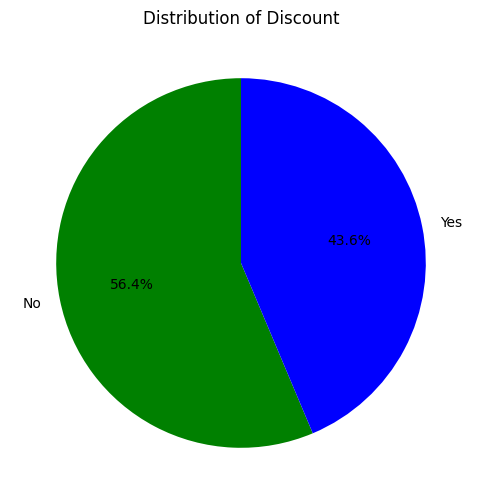

In [23]:
dc = airpods_data['Discount'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(dc, labels=dc.index, autopct='%1.1f%%', startangle=90, colors=['green', 'blue'])
plt.title('Distribution of Discount')
plt.show()

In [22]:
airpods_data['Holiday'].unique()

array([1, 0])

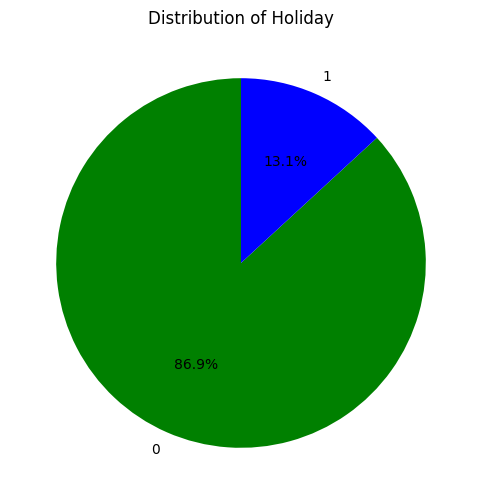

In [24]:
HD = airpods_data['Holiday'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(HD, labels=HD.index, autopct='%1.1f%%', startangle=90, colors=['green', 'blue'])
plt.title('Distribution of Holiday')
plt.show()

In [26]:
airpods_data.dtypes

Store_id          category
Store_Type        category
Apple_products    category
Region_Code       category
Holiday              int64
Discount          category
#Order               int64
Sales              float64
year              category
dtype: object

In [27]:
airpods_data['Store_id']=airpods_data['Store_id'].cat.codes
airpods_data['Store_Type']=airpods_data['Store_Type'].cat.codes
airpods_data['Apple_products']=airpods_data['Apple_products'].cat.codes
airpods_data['Region_Code']=airpods_data['Region_Code'].cat.codes
airpods_data['Discount']=airpods_data['Discount'].cat.codes
airpods_data['year']=airpods_data['year'].cat.codes
#convert all necessary categorical data into numeric by using cat codes under label encoding

In [28]:
airpods_data.dtypes

Store_id            int16
Store_Type           int8
Apple_products       int8
Region_Code          int8
Holiday             int64
Discount             int8
#Order              int64
Sales             float64
year                 int8
dtype: object

Feature Selection:

In [31]:
airpods_data.columns

Index(['Store_id', 'Store_Type', 'Apple_products', 'Region_Code', 'Holiday',
       'Discount', '#Order', 'Sales', 'year'],
      dtype='object')

In [33]:
co_matrix=round(airpods_data[['Store_id', 'Store_Type', 'Region_Code', 'Holiday',
       'Discount', '#Order', 'Sales', 'year']].corr(),2) #Making correlation matrix to show the relationship between variables.

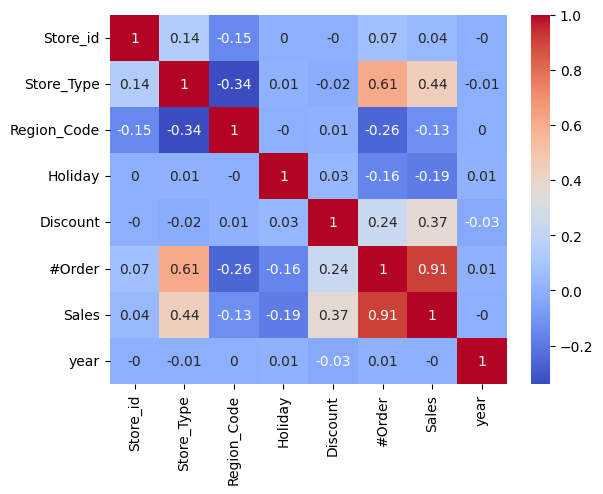

In [34]:
plt.figure()
sb.heatmap(co_matrix, annot=True, cmap="coolwarm")
plt.show()


Here, through the correlation matrix we can see that data variable year has no relation with our target variable sales. Hence we will drop it from our analysis. Moreover, we can see that order is highly corelated with sales. We can also drop store id as its not much related to our target variable sales.

In [35]:
airpods_data=airpods_data.drop(["year","Store_id"],axis=1)

Model Training:

In [36]:
dfx = airpods_data.drop("Sales",axis=1)

In [37]:
dfy = airpods_data['Sales'] #spliting our datset into input and out put dataset. dfx is input and dfy is output

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler=MinMaxScaler()

In [40]:
scaled_dfx = pd.DataFrame(scaler.fit_transform(dfx),columns=dfx.columns) #scaling our data into one scale as its good when you are using ML model

In [41]:
scaled_dfx.head()

,Store_Type,Apple_products,Region_Code,Holiday,Discount,#Order
0,1.000000,0.0,0.000000,1.0,1.0,0.388489
1,0.666667,0.0,0.000000,1.0,1.0,0.258993
2,0.000000,0.0,0.333333,1.0,1.0,0.244604
3,0.000000,0.0,0.666667,1.0,1.0,0.417266
4,0.666667,0.0,0.666667,1.0,1.0,0.402878


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(scaled_dfx, dfy, test_size=0.2, random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
LR = LinearRegression()

In [47]:
LR.fit(x_train, y_train)

LinearRegression()

In [48]:
Pred_LR = LR.predict(x_test)

In [49]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error

In [50]:
import numpy as np

In [51]:
mae = mean_absolute_error(y_test, Pred_LR)
rmse = np.sqrt(mean_squared_error(y_test, Pred_LR))

In [52]:
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 4060.86986016249
Root Mean Squared Error: 5282.040127177478


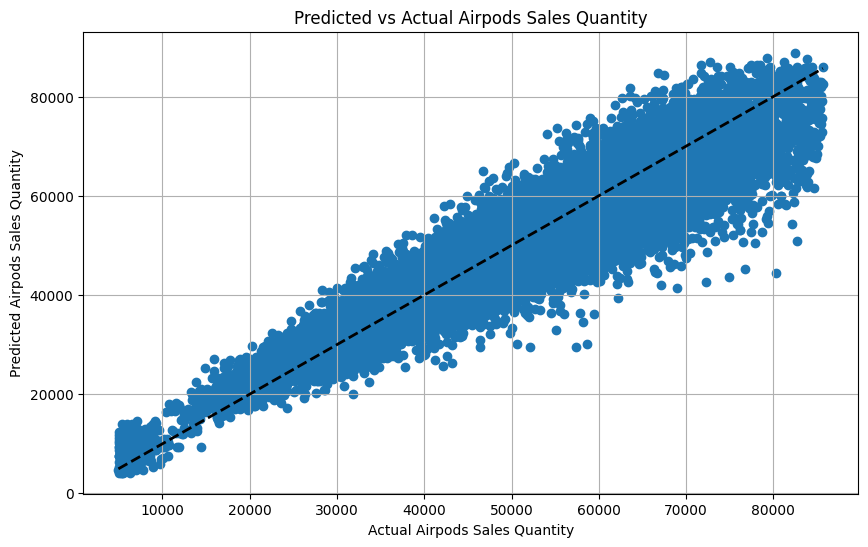

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, Pred_LR)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Airpods Sales Quantity')
plt.ylabel('Predicted Airpods Sales Quantity')
plt.title('Predicted vs Actual Airpods Sales Quantity')
plt.grid(True)
plt.show()

Applying GridSearchCV

In [54]:
from sklearn.model_selection import GridSearchCV

In [58]:
# Define hyperparameters to tune
param_grid = {
    'fit_intercept': [True, False],
}

In [59]:
# Define GridSearchCV
grid_search = GridSearchCV(estimator=LR, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [60]:
grid_search.fit(dfx,dfy)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [61]:
# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [62]:
print("Best Parameters:", best_params)
print("Best Score (negative mean squared error):", best_score)

Best Parameters: {'fit_intercept': True}
Best Score (negative mean squared error): -29185888.91531951


In [63]:
LR_Grid=LinearRegression(fit_intercept=True)

In [64]:
LR_Grid.fit(x_train,y_train)

LinearRegression()

In [65]:
LR_Grid_Pred=LR_Grid.predict(x_test)

In [66]:
mae_Grid = mean_absolute_error(y_test, LR_Grid_Pred)
rmse_Grid = np.sqrt(mean_squared_error(y_test, LR_Grid_Pred))

In [67]:
print('Mean Absolute Error:', mae_Grid)
print('Root Mean Squared Error:', rmse_Grid)

Mean Absolute Error: 4060.86986016249
Root Mean Squared Error: 5282.040127177478


As both LR giving us the same rMSE we are trying new algorithm decision tree with GridSearchCV.

In [68]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
DT = DecisionTreeRegressor()

In [70]:
# Define hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [71]:
# Define GridSearchCV
grid_search = GridSearchCV(estimator=DT, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [72]:
grid_search.fit(scaled_dfx,dfy)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [73]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [74]:
print("Best Parameters:", best_params)
print("Best Score (negative mean squared error):", best_score)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score (negative mean squared error): -27242315.512076456


In [75]:
DT_Grid=DecisionTreeRegressor(max_depth=None, min_samples_leaf=4, min_samples_split=10)

In [76]:
DT_Grid.fit(x_train,y_train)

DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=10)

In [77]:
Pred_DT_Grid=DT_Grid.predict(x_test)

In [78]:
mae_DT_Grid = mean_absolute_error(y_test, Pred_DT_Grid)
rmse_DT_Grid = np.sqrt(mean_squared_error(y_test, Pred_DT_Grid))

In [79]:
print('Mean Absolute Error:', mae_DT_Grid)
print('Root Mean Squared Error:', rmse_DT_Grid)

Mean Absolute Error: 3876.759782370765
Root Mean Squared Error: 5080.71175133524


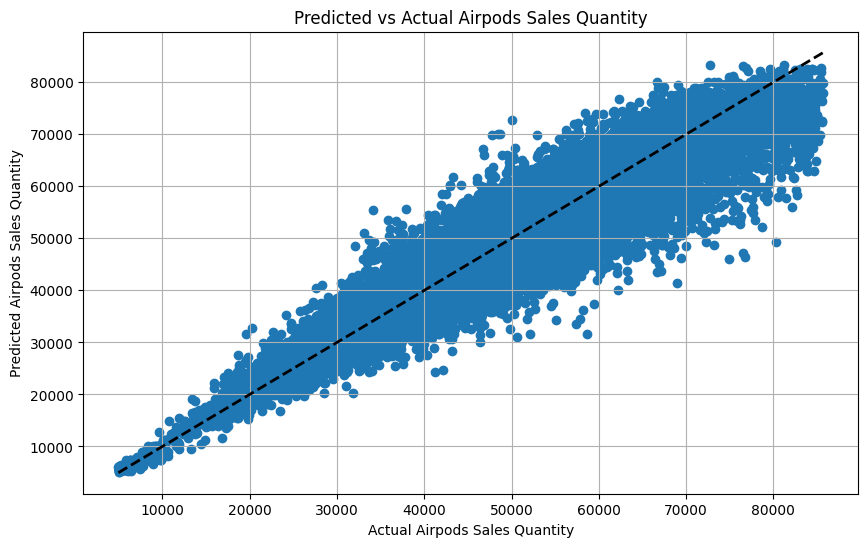

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, Pred_DT_Grid)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Airpods Sales Quantity')
plt.ylabel('Predicted Airpods Sales Quantity')
plt.title('Predicted vs Actual Airpods Sales Quantity')
plt.grid(True)
plt.show()

By comparing both algorithm's rmse we can say that decision tree regressor works better for the apple stock data.